In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from multiworld.envs.mujoco.classic_mujoco.ant_maze import AntMazeEnv
from multiworld.envs.mujoco.classic_mujoco.ant import AntEnv
from multiworld.envs.mujoco import register_mujoco_envs

import gym

Skipping mujoco
[Ant] Diagnostics goal: None
xy_observation: [-6.   4.5]
xy_desired_goal: [ 5.5 -4.5]
reward_type: xy_dense
reward: -14.603081866510234


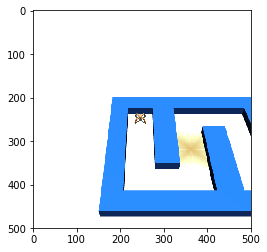

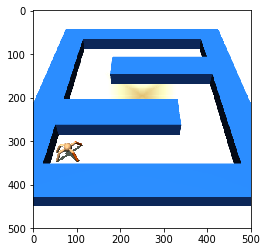

In [17]:
register_mujoco_envs()
env = gym.make('Ant-MazeSEnv-v0', use_low_gear_ratio=False)

def render_state(qpos):
    env.set_env_state((qpos, {'qpos_desired_goal': np.zeros(15)}))
    plt.figure()
    plt.imshow(env.render(mode='rgb_array'))

# Maze Env: go from -5.5, 4.5 => 5.5, -4.5
render_state([-5.5, 4.5, 0.565, 1., 0., 0., 0., 0.,
                 1., 0., -1., 0., -1., 0., 1.])

env.viewer.cam.elevation = -45
env.viewer.cam.azimuth = 0
env.viewer.cam.distance = 22
env.viewer.cam.lookat[0] = 0
env.viewer.cam.lookat[1] = 0
env.viewer.cam.lookat[2] = -2.5

    
render_state([-5.5, 4.5, 0.565, 1., 0., 0., 0, 1.,
                 1., 0., -1., 0., -1., 0., 1.])
    
goals = np.load('multiworld/envs/assets/classic_mujoco/AntMazeSmall30RandomInitFs5Dt3Env-v0-states.npy')

# qpos explanation:
# (1-3) x, y, z coordinates
# (4) ?
# (5-7) rotation
# (8) red leg ground position
# (9) red leg extension angle (1 is on ground, 0 is raised flat)
# (10-11) green leg
# (12-13) blue leg
# (14-15) brown leg

env.reset()
obs = env._get_obs()
print('xy_observation:', obs['xy_observation'])
print('xy_desired_goal:', obs['xy_desired_goal'])
print('reward_type:', env.reward_type)
print('reward:', env.compute_reward(np.zeros(1), obs))

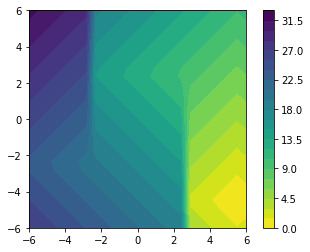

In [7]:
from notebook_helpers import *

grid_vals = get_grid_vals(low=-6, high=6, bins=24)
distances = env._get_manhattan_distance(grid_vals, np.array([5.5, -4.5]))
plt.contourf(grid_vals[:,0].reshape(24, 24), grid_vals[:,1].reshape(24, 24), distances.reshape(24, 24), levels=30, cmap='viridis_r')
plt.gca().set_aspect("equal")
plt.colorbar()